Loading Data & Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("Spectral")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ariefprasetyohadi/Supermarket-EDA/main/supermarket_sales.csv")

Show sample of data

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.shape

(1000, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = data.nunique().reset_index()

# 2- rename column name
columnValue.rename(columns = {"index" : "Column _name", 0 : "Unique values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Unique values
0,Invoice ID,1000
1,Branch,3
2,City,3
3,Customer type,2
4,Gender,2
5,Product line,6
6,Unit price,943
7,Quantity,10
8,Tax 5%,990
9,Total,990


In [ ]:
data.isna().sum() / data.shape[0]

,0
Invoice ID,0.0
Branch,0.0
City,0.0
Customer type,0.0
Gender,0.0
Product line,0.0
Unit price,0.0
Quantity,0.0
Tax 5%,0.0
Total,0.0


In [ ]:
# check if duplicated data

data.duplicated().any()

False

In [ ]:
# info of numeric values

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
# info of category values

data.describe(include = object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


Above cells' conclusion
Dataset no missing values
Dataset has no complete duplicates
We need to remove some columns not use
We need to modify some column data type

In [ ]:
# create function to visualized categorical column using count plot

def count_plot(x_axis, hue = None, rotation = 0):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = x_axis, data = data, hue = hue, order = data[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage
    """
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [ ]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

Cleaning

In [ ]:
# convert data column to datetime

data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
# add new column Month

data["Month"] = data["Date"].dt.month

In [ ]:
# drop invoice ID column

data.drop(columns = ["Invoice ID","cogs", "gross margin percentage", "Date", "Time"], inplace = True)

In [ ]:
# see sample of data

data.sample(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,gross income,Rating,Month
180,C,Naypyitaw,Normal,Male,Fashion accessories,64.26,7,22.491,472.311,Cash,22.491,5.7,2
680,B,Mandalay,Member,Female,Electronic accessories,39.48,1,1.974,41.454,Cash,1.974,6.5,2


**Univariate Analysis**

Discovering Branch column

In [ ]:
# see unique values

data["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

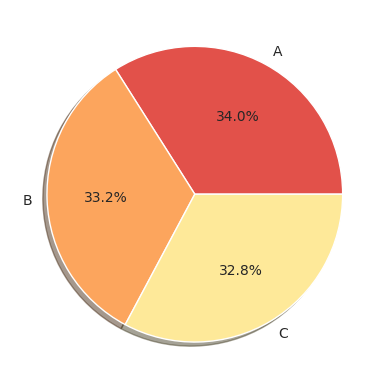

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Branch") # call function i create it in cell 11

We can see :

We have 3 Branches "A", "B" and "C"
Branche A has largest Sales numbers
Branche C has fewest Sales numbers

Discovering Customer type column

In [ ]:
# see unique values

data["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

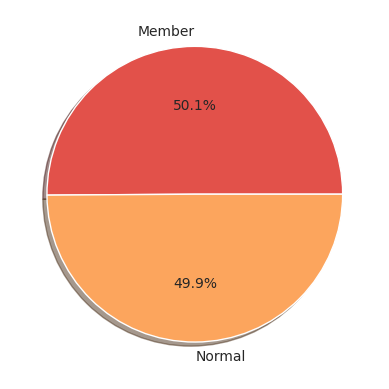

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Customer type") # call function i create it in cell 11


From the above
Most people come to branches has member card

**Discovering Gender column**

In [ ]:
# see unique values

data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

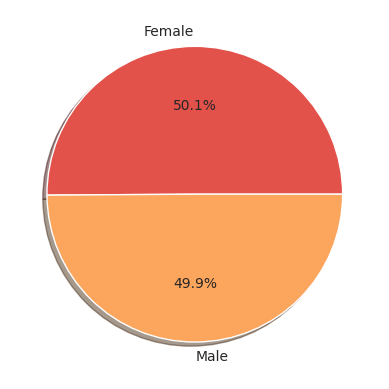

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Gender") # call function i create it in cell 11

From the above Most Gender Come to branches is female

**Discovering Product line column**

In [ ]:
# see unique values

data["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

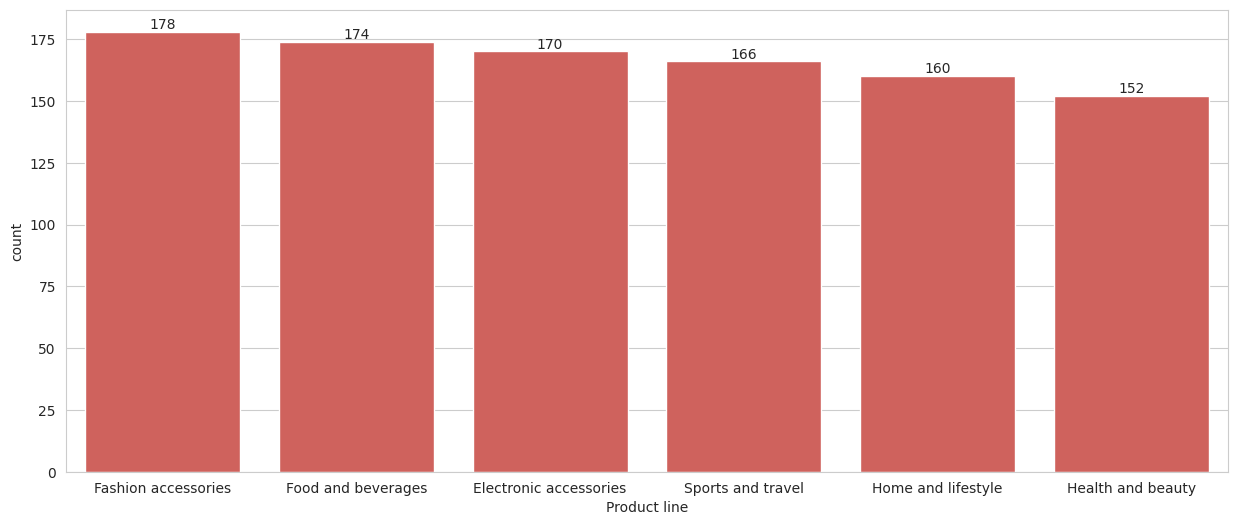

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot("Product line")

We can see :

Most sales in branches is "Fashion accessories"
Lest sales in branches is "Health and beauty"

Discovering Payment column

In [ ]:
# see unique values

data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

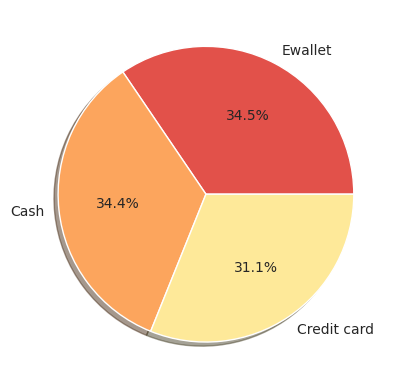

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Payment") # call function i create it in cell 11

From the above
Customers prefered to Ewallet,cash payments

Discovering Rating column

In [ ]:
# see unique values

data["Rating"].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

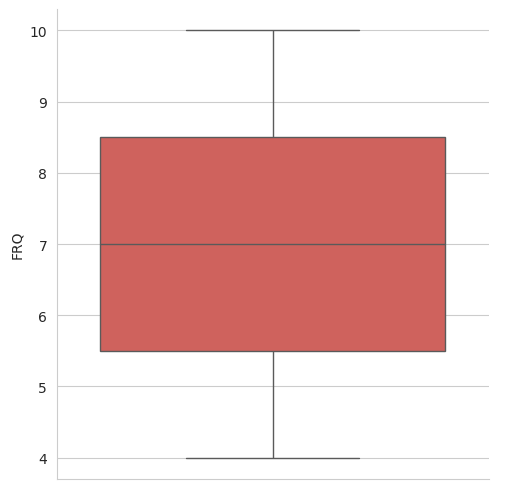

In [ ]:
# see distribution

box_plot(y_axis = "Rating") # call function i create it in cell 12

From the above
Average rating across products is approximately 7

Discovering Month column

In [ ]:
# see unique values

data["Month"].unique()

array([1, 3, 2], dtype=int32)

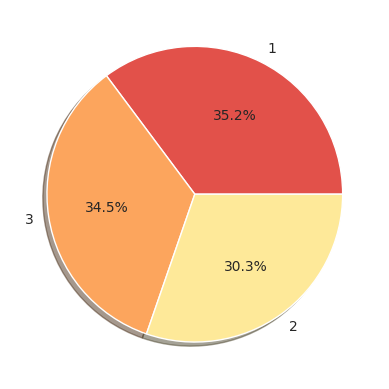

In [ ]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Month") # call function i create it in cell 11

We can see :

We have 3 Branches "A", "B" and "C"
Branche A has largest Sales numbers
Branche C has fewest Sales numbers

**Bivariate Analysis & Visualizations**

1) Which branch have the highest rating ?

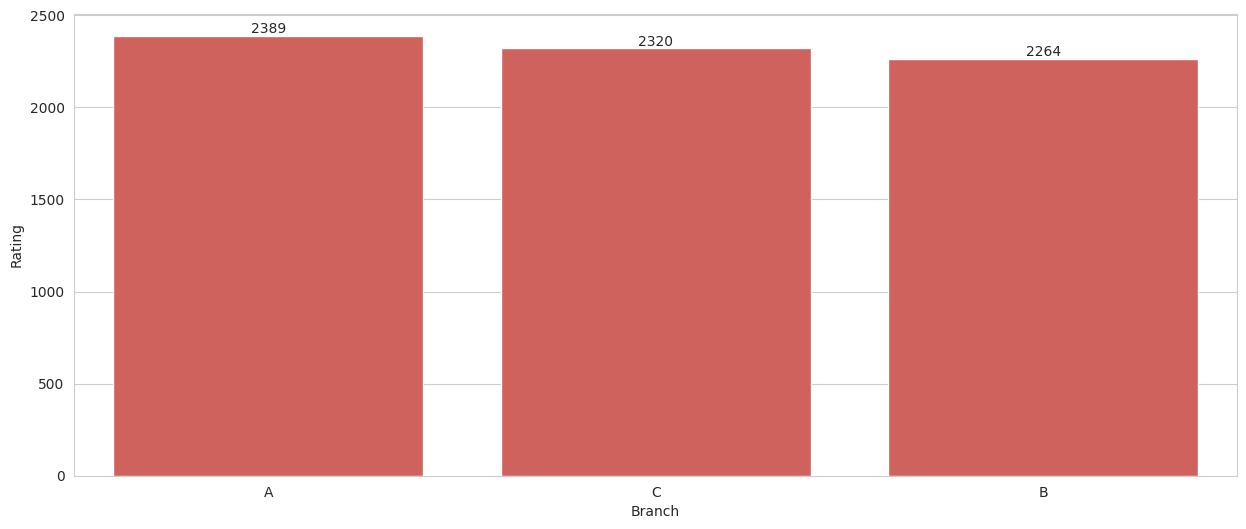

In [ ]:
# 1- create products dataFrame
rating = data.groupby("Branch")[["Rating"]].sum().sort_values(by = "Rating", ascending = False)

# 2- first set figure size
plt.figure(figsize=(15,6))

# 3- create bar plot
ax = sns.barplot(x = "Branch", y = "Rating", data = rating)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

Branch A is the highest rating

2) What is gross income of each branch ?

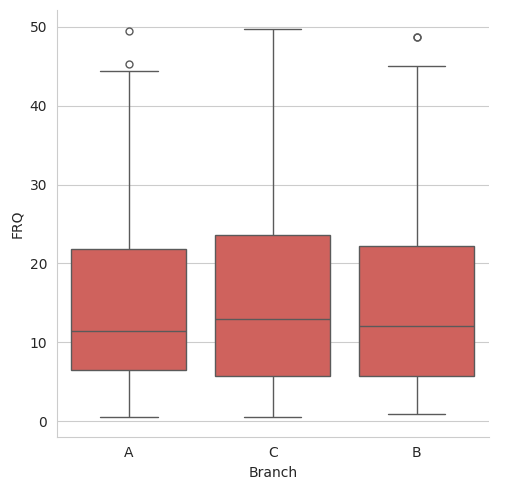

In [ ]:
# call function i create it in cell 12

box_plot(x_axis = "Branch", y_axis = "gross income")

Branch C stands out slightly with higher income compared to Branch A and B. Despite Branch A having slightly higher sales, it is Branch C that emerges as the most profitable branch in terms of gross income

3) See Gender come to branches



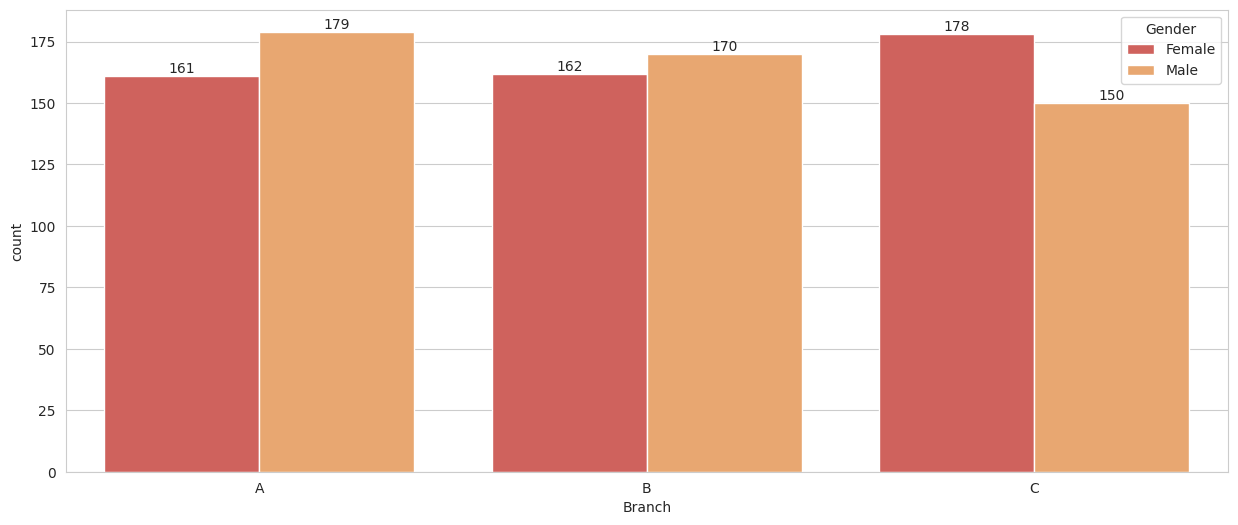

In [ ]:
# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(x_axis = "Branch", hue = "Gender")

Branch A,B has males greater than females, but branch C has females greater than males

4) What is male and female gross income in each branch ?

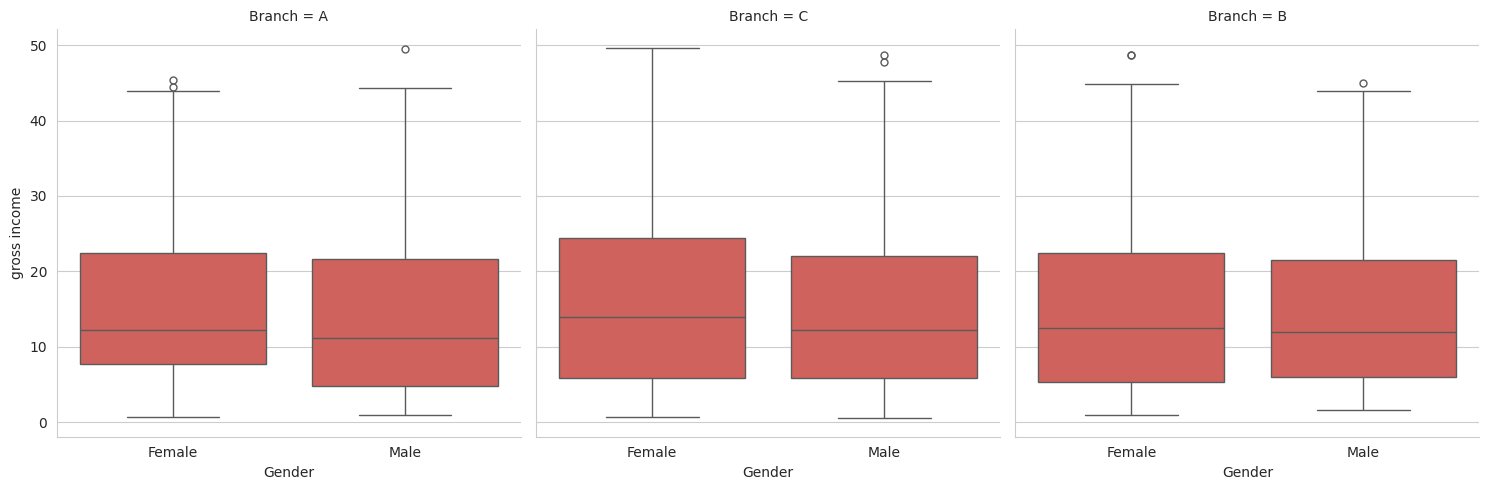

In [ ]:
# call function i create it in cell 12

box_plot(x_axis = "Gender", y_axis = "gross income", col = "Branch")

"Female" gross income greater than Male in each branch

5) See sales product line in branches

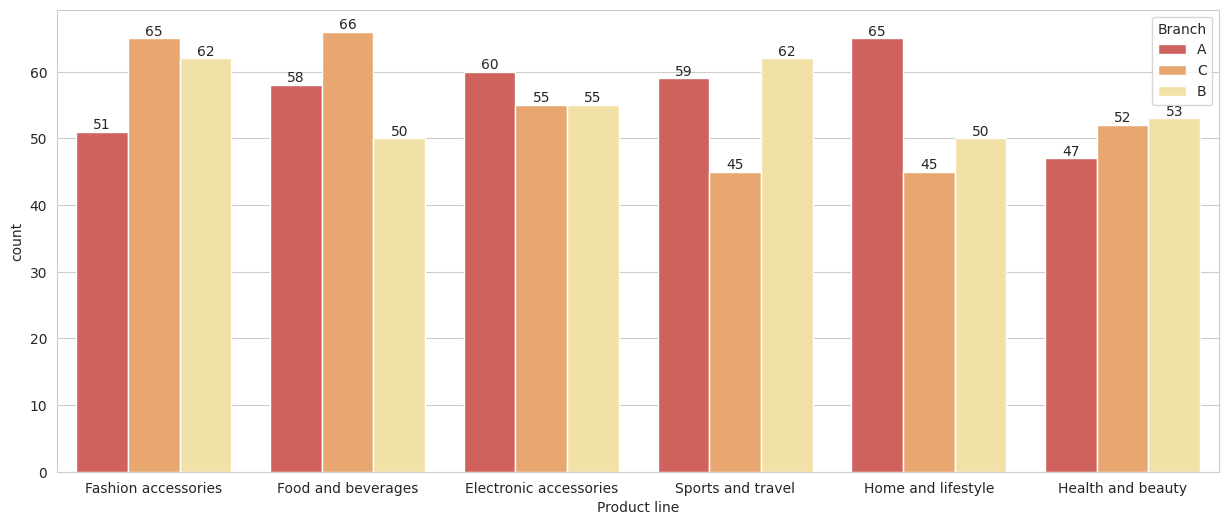

In [ ]:
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Branch")

From above
"Electronic accessories", "Home and lifestyle" is the most sales in branch A
"Health and beauty", "Sports and travel" is the most sales in branch B
"Food and beverages", "Fashion accessories" is the most sales in branch C

6) What is number of customer type of each branch ?

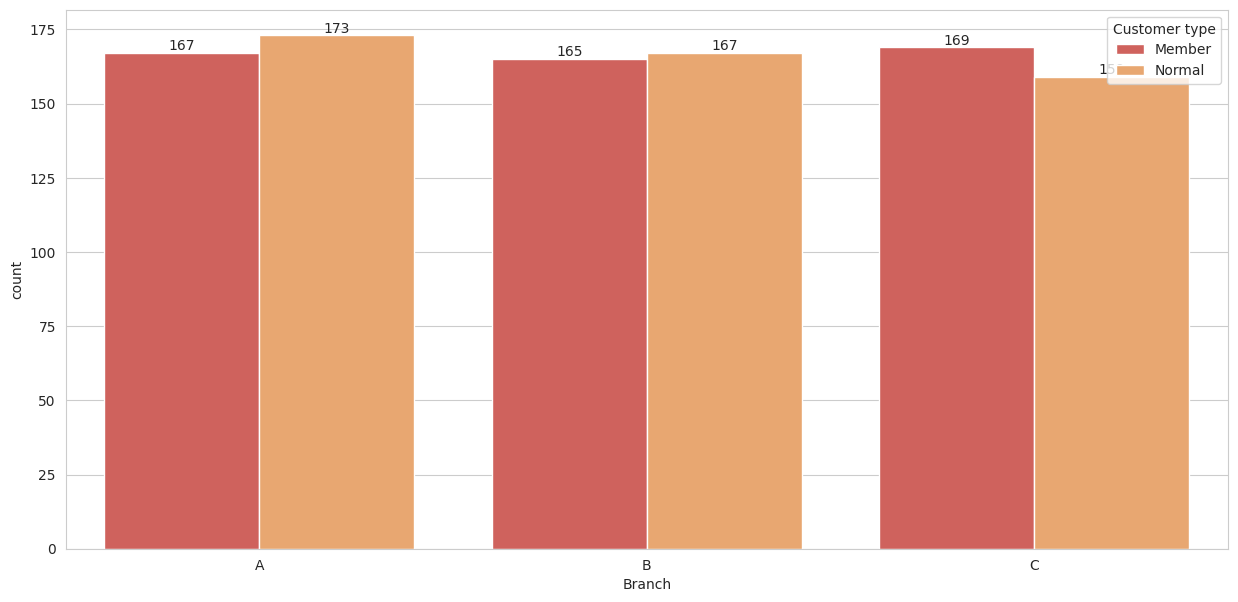

In [ ]:
# first set figure size
plt.figure(figsize=(15,7))

# call function i create it in cell 10
count_plot(x_axis = "Branch", hue = "Customer type")

From above
Branch A, Normal customer greater than Member
Branch B, Normal customer greater than Member
Branch C, Member customer greater than Normal

When  number of members in Branch increased,Total of gross income increased

7) What is relation between customer gender and product line ?

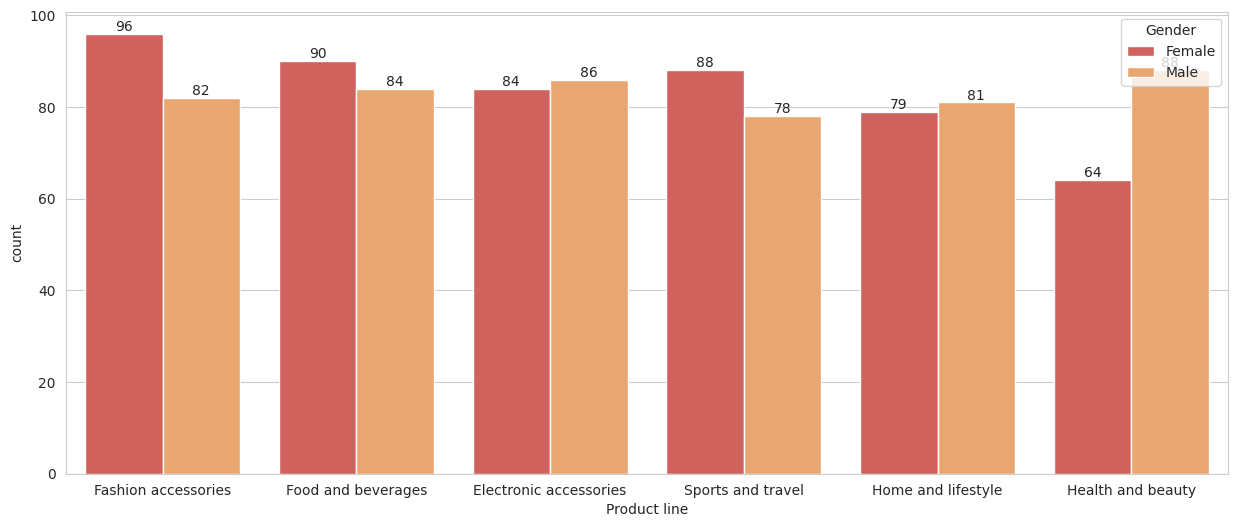

In [ ]:
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Gender")

When number of females increase, Fashion accessories Product line increase

When number of male increase,Health and beauty Product line increase

8) Which product line have greater gross income ?

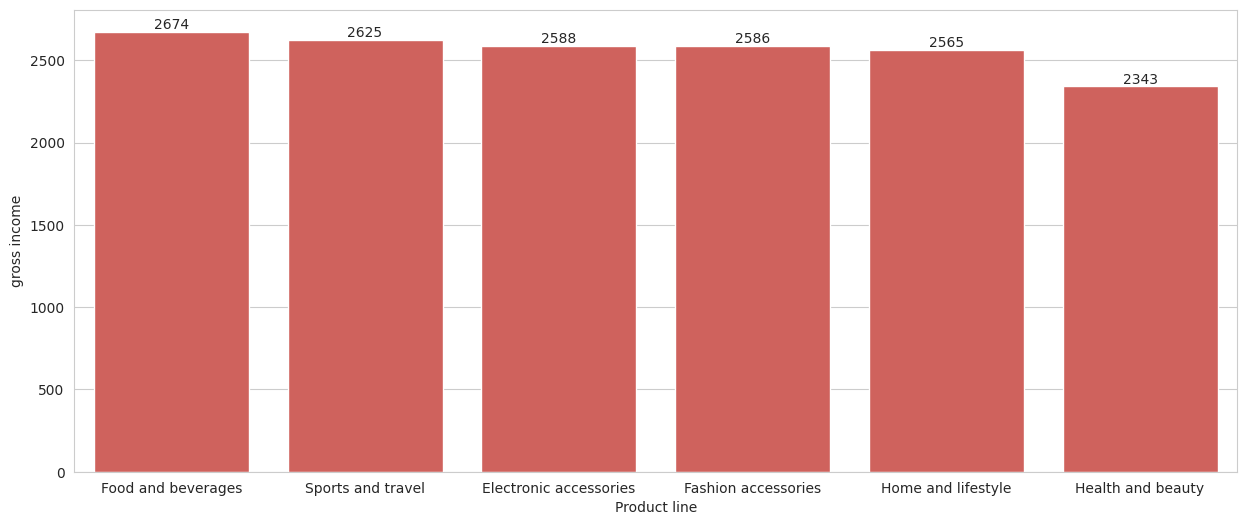

In [ ]:
# 1- create products dataFrame
products = data.groupby("Product line")[["gross income"]].sum().sort_values(by = "gross income", ascending = False)

# 2- first set figure size
plt.figure(figsize=(15,6))

# 3- visualized products
ax = sns.barplot(x = products.index, y = "gross income", data = products)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')
plt.show()

~ Gross income is highest in food and beverages

9) What is month has greater gross income in each branch ?

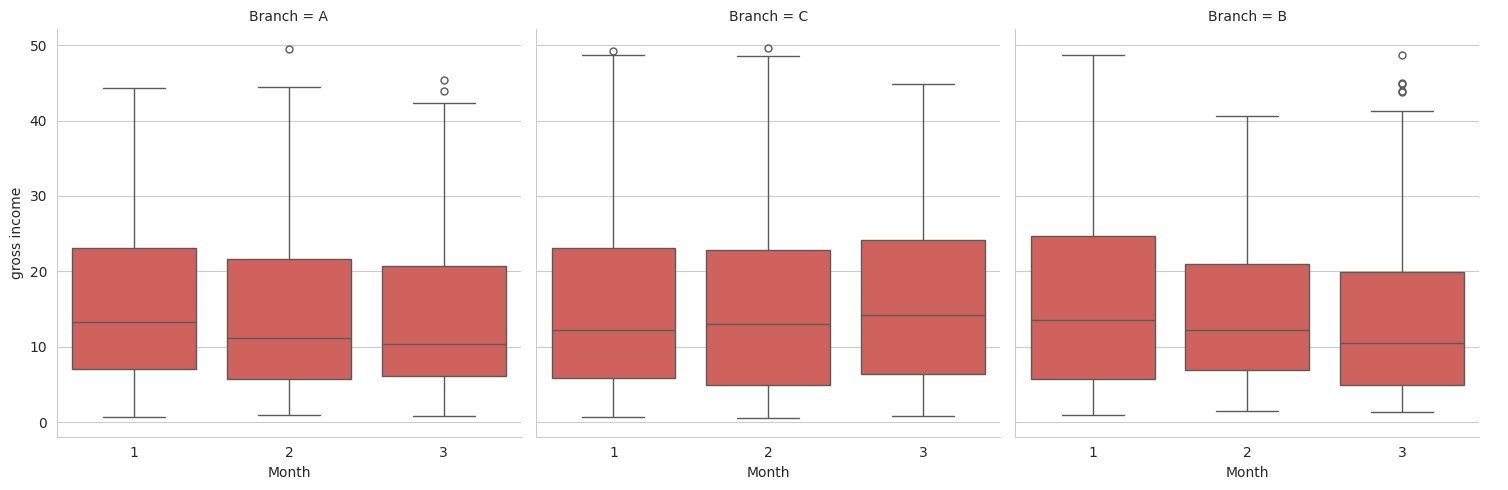

In [ ]:
# call function i create it in cell 12

box_plot(x_axis = "Month", y_axis = "gross income", col = "Branch")

~ "january" month has greater gross income

10) What is greater sales product line in each month ?

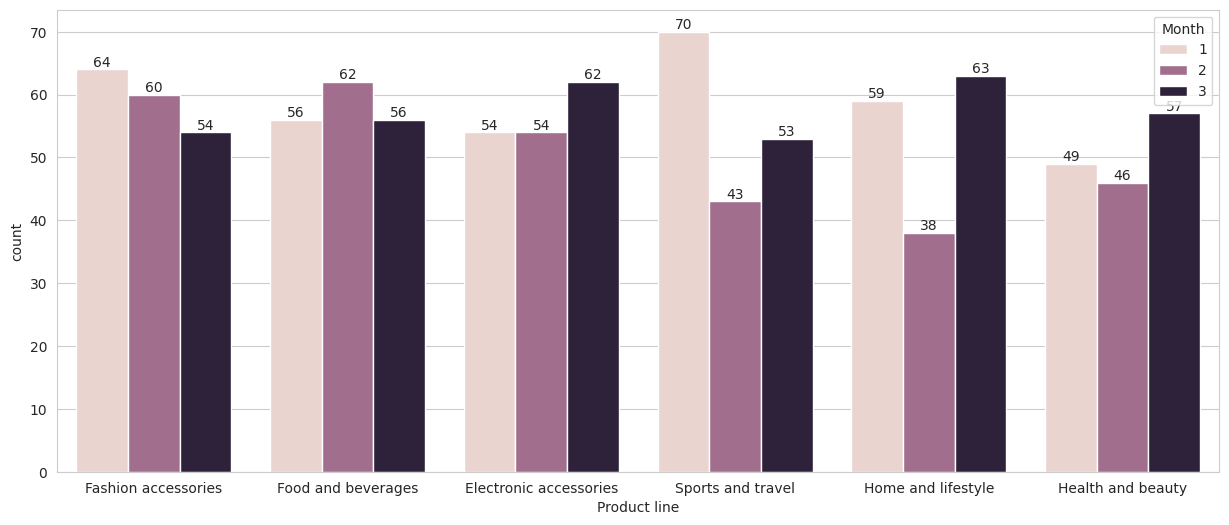

In [ ]:
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Month")

####***From*** ***above***
#### 1. January

~ Sports and travel, Fashion accessories is the most product line sales
#### 2. March

~ Electronic accessories, Home and lifestyle is the most product line sales
#### 3. February

~ Food and beverages, Fashion accessories is the most product line sales


In [ ]:
# add new column revenue

data["Revenue"] = data["Quantity"] * data["Unit price"]

In [ ]:
# see sample of data

data.sample(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,gross income,Rating,Month,Revenue
920,C,Naypyitaw,Member,Female,Home and lifestyle,35.79,9,16.1055,338.2155,Credit card,16.1055,5.1,3,322.11
12,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,Ewallet,11.7375,7.1,2,234.75
337,B,Mandalay,Normal,Female,Sports and travel,57.95,6,17.3850,365.0850,Cash,17.3850,5.2,2,347.70
306,A,Yangon,Normal,Female,Sports and travel,40.23,7,14.0805,295.6905,Cash,14.0805,9.6,3,281.61
175,A,Yangon,Member,Male,Home and lifestyle,33.84,9,15.2280,319.7880,Ewallet,15.2280,8.8,3,304.56


11. What city does the biggest income come from?

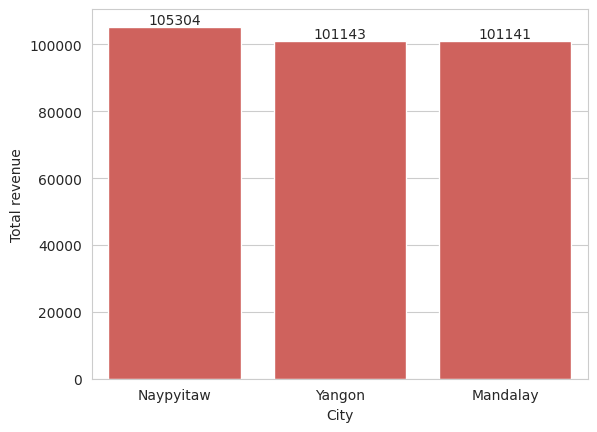

In [ ]:
# Total revenue in each city

# Calculate total revenue for each city
revenue = data.groupby("City")["Revenue"].sum().reset_index(name = "Total revenue").sort_values(by = "Total revenue", ascending = False)

# create bar plot
ax = sns.barplot(x = "City", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

The highest revenue comes from Naypyitaw City compared to the other two cities, Yangon City and Mandalay have a slight difference in revenue value.

## **TOTAL REVENUE**

Total revenue: 307587.38


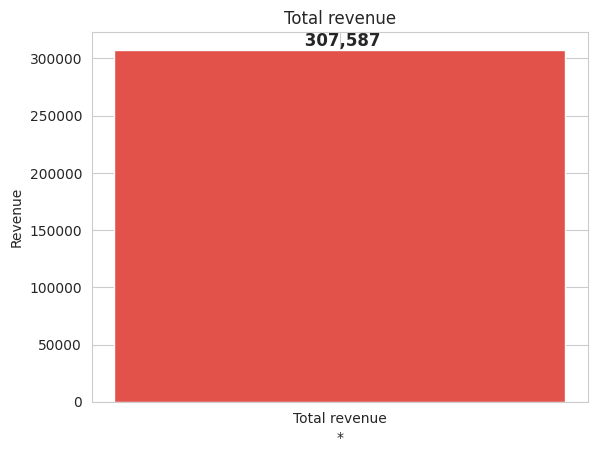

In [ ]:
# Show only revenue column
revenue = data['Revenue']

# Sum revenue into total revenue
total_revenue = revenue.sum()

print("Total revenue:", total_revenue)

# Show total revenue in a bar chart
plt.bar(['Total revenue'], [total_revenue])
plt.xlabel('*')
plt.ylabel('Revenue')
plt.title('Total revenue')

# add data label
plt.text(0, total_revenue, f" {total_revenue:,.0f}", ha="center", va="bottom", fontsize=12, fontweight='bold')
plt.show()


The total income for three months (from Jan to March) in 2019 was 307,587.

#### ***Conclusion***

#### ~ Customer average rating of approximately 7. there was no relationship between customer ratings and gross income

#### ~ Among the three branches, Branch C as the most profitable in terms of gross income, despite Branch A having slightly higher sales

#### ~ Fashion Accessories and Food and Beverages were the most products. Therefore, must focus on these categories, with electronic accessories

#### ~ Customer prefer payment methods using e-wallets and cash.

#### ~ Food and Beverage proved to be the category generating the highest gross income overall

#### ~ Females spend the most on fashion accessories, while males preference for health and beauty products Females also spending on sports and travel, which contributed to the highest overall income